# BANCOS
Este programa simula a chegada de clientes a um banco, que possui alguns postos de atendimento (caixas). A fila é única para todos os caixas.
Os tempos entre chegadas de clientes segue uma distribuição exponencial.
A duração do atendimento a um cliente no caixa segue uma distribuição normal. 

Ao final, você encontra algumas sugestões de melhorias neste programa, que você pode fazer como exercício.

# eventos 
É uma lista de eventos programados, sendo que cada evento
pode ser:


*   -1 é o evento da chegada de um cliente ao banco
*   0, 1, 2 ... é o evento do término do atendimento de um cliente
no caixa 0, 1, 2, ...




# horario_eventos
É a lista dos horários em que ocorrerão os eventos programados na lista **eventos**. 

# caixas
É uma lista dos caixas (postos de atendimentos). Cada caixa pode estar em um dos seguintes estados:
*   "livre"
*   "ocupado"
*   "fechado"





# **fila**
É uma lista que contém os horários de chegada nos clientes que comporão a fila de atendimento. Serve para podermos medir o tempo de espera em fila. 

# **horario**
Variável inteira com o horário atual. O tempo é medido em segundos, contados a partir do instante 0 (instante em que a simulação começou a ser executada).

# **tempos_espera**
Lista que registra o tempo de espera na fila de cada cliente que vem ao banco. Se o cliente não encontrou nenhuma fila, registra zero. Unidade é minutos (e não segundos!). 

In [1]:
import random

random.seed(1)

def chegada():  

    global horario, eventos, horario_eventos, caixas, fila, tamanho_fila, relogio

    eventos.append(-1)
    
    if g_distribuicao_chegada == 'gauss':
        h = horario + random.gauss(g_media_chegada, g_desvio_padrao_chegada)
    elif g_distribuicao_chegada == 'exp':
        h = horario + random.expovariate( 1 / g_media_chegada)
    else:
        raise ValueError('Distribução de chegada não suportada')

    horario_eventos.append(h)

    if "livre" in caixas:
        i = caixas.index("livre")
        caixas[i] = "ocupado"
        eventos.append(i)
    
        if g_distribuicao_atendimento == 'gauss':
            h = horario + random.gauss(g_media_atendimento, g_desvio_padrao_atendimento)
        elif g_distribuicao_atendimento == 'exp':
            h = horario + random.expovariate( 1 / g_media_atendimento)
        else:
            raise ValueError('Distribução de atendimento não suportada')

        horario_eventos.append(h)

        tempos_espera.append(0)
        if g_verbose: print("Programado evento de final de atendimento no caixa ", i, " aos", round(h,1), "segundos")
    else:
        fila.append(horario)
        

In [2]:
def saida(i):
  
    global horario, eventos, horario_eventos, caixas, fila, tamanho_fila, relogio
    
    if len(fila) == 0:
        caixas[i] = "livre"
    else:
        tempos_espera.append((horario-fila[0]) / 60)
        del fila[0]
        eventos.append(i)
        y = horario+random.gauss(180, 30)
        horario_eventos.append(y)
        if g_verbose: print("Programado evento de final de atendimento no caixa ", i, " aos", round(y, 1), "segundos")


In [3]:
def proximo_evento():
  
    global horario, eventos, horario_eventos, caixas, fila, tamanho_fila, relogio

    pos = horario_eventos.index(min(horario_eventos))
    evento = eventos[pos]
    horario = horario_eventos[pos]
    if evento == -1:
        e = "chegada de cliente"
    else:
        e = "término de atendimento no caixa " + str(evento)
    
    if g_verbose: print("Tratando evento = " + e + ", horário do evento =", round(horario, 1), "segundos")
    eventos.pop(pos)
    horario_eventos.pop(pos)
    return evento
    

In [4]:
def set_parameters(distribuicao_chegada, distribuicao_atendimento, media_chegada, 
                   desvio_padrao_chegada, media_atendimento, desvio_padrao_atendimento, 
                   numero_de_caixas, senior_prioridade, senior_probabilidade, verbose = False):

    global horario, eventos, horario_eventos, caixas, fila, tempos_espera, tamanho_fila, relogio, g_verbose

    global g_distribuicao_chegada, g_distribuicao_atendimento, g_media_chegada, g_desvio_padrao_chegada
    global g_media_atendimento, g_desvio_padrao_atendimento, g_senior_prioridade, g_senior_probabilidade

    g_distribuicao_chegada = distribuicao_chegada
    g_distribuicao_atendimento = distribuicao_atendimento
    g_media_chegada = media_chegada
    g_desvio_padrao_chegada = desvio_padrao_chegada
    g_media_atendimento = media_atendimento
    g_desvio_padrao_atendimento = desvio_padrao_atendimento
    g_senior_prioridade = senior_prioridade
    g_senior_probabilidade = senior_probabilidade
    g_verbose = verbose

    caixas = []
    for x in range(numero_de_caixas):
        caixas.append('livre')

    horario = 0 
    eventos = [-1]
    horario_eventos = [0]        
    fila = []
    tempos_espera = []    
    tamanho_fila = []
    relogio = []


In [5]:
import time

def run_simulation(horas_de_simulacao):

    global horario, eventos, horario_eventos, caixas, fila, tamanho_fila, relogio

    while horario < 60 * 60 * horas_de_simulacao:  # 3 horas

        if g_verbose: time.sleep(1) # para melhorar a apresentação (ser quiser fazê-la pausada)

        x = proximo_evento()

        if x == -1:
            chegada()
        else:
            saida(x)

        if g_verbose:
            print("Tamanho da fila = ", len(fila))
            print("Caixas: " , caixas)
            print()

        tamanho_fila.append(len(fila))
        relogio.append(horario / 60 / 60)

        if g_verbose:
            print("**** Tempo máximo de espera na fila (minutos): ", round(max(tempos_espera), 1))
            print("**** Tempo médio de espera na fila (minutos): ", round(sum(tempos_espera)/len(tempos_espera), 1))
            print('\n\n')


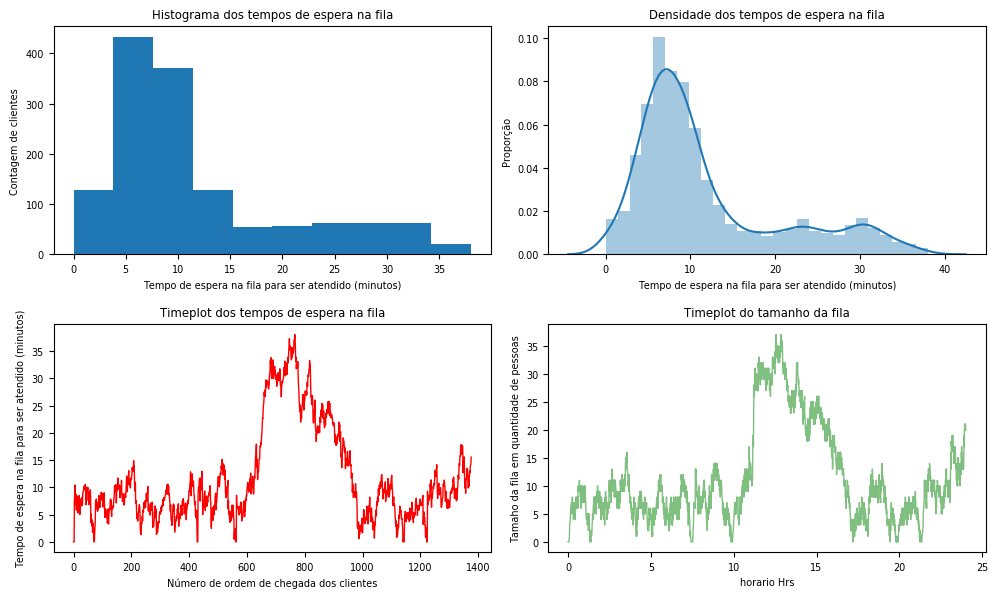

In [71]:
%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use('default')
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams.update({'font.size': 7})

fig, ax = plt.subplots(nrows = 2, ncols = 2)

ax[0, 0].hist(tempos_espera)
ax[0, 0].set_title('Histograma dos tempos de espera na fila')
ax[0, 0].set_xlabel("Tempo de espera na fila para ser atendido (minutos)")
ax[0, 0].set_ylabel("Contagem de clientes")
#ax[0, 0].grid(False)

sns.distplot(tempos_espera, hist = True, ax = ax[0, 1])
ax[0, 1].set_title('Densidade dos tempos de espera na fila')
ax[0, 1].set_xlabel("Tempo de espera na fila para ser atendido (minutos)")
ax[0, 1].set_ylabel("Proporção")

ax[1, 0].plot(tempos_espera, color = "r", linewidth = 1)
ax[1, 0].set_title('Timeplot dos tempos de espera na fila')
ax[1, 0].set_xlabel("Número de ordem de chegada dos clientes")
ax[1, 0].set_ylabel("Tempo de espera na fila para ser atendido (minutos)")
#ax[1, 0].grid(False)

ax[1, 1].plot(relogio, tamanho_fila, color = "g", alpha = 0.5, linewidth = 1)
ax[1, 1].set_title('Timeplot do tamanho da fila')
ax[1, 1].set_xlabel("horario Hrs")
ax[1, 1].set_ylabel("Tamaho da fila em quantidade de pessoas")
#ax[1, 1].grid(False)

plt.tight_layout()


In [41]:
%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use('default')
plt.rcParams["figure.figsize"] = (4, 2)
plt.rcParams.update({'font.size': 7})

def plot_simulation(histograma = True, densidade = True, 
                    tempo_espera = True, tamnho_fila = True):

    if histograma:
        plt.hist(tempos_espera)
        plt.title('Histograma dos tempos de espera na fila')
        plt.xlabel("Tempo de espera na fila para ser atendido (minutos)")
        plt.ylabel("Contagem de clientes")
        #plt.ylim(0, 150)
        plt.grid(False)
        plt.show()

    if densidade:
        sns.distplot(tempos_espera, hist = True)
        plt.title('Densidade dos tempos de espera na fila')
        plt.xlabel("Tempo de espera na fila para ser atendido (minutos)")
        plt.ylabel("Proporção")
        plt.xlim(0)
        plt.show()

    if tempo_espera:
        plt.plot(tempos_espera, color = "r", linewidth = 1)
        plt.title('Timeplot dos tempos de espera na fila')
        plt.xlabel("Número de ordem de chegada dos clientes")
        plt.ylabel("Tempo de espera na fila para ser atendido (minutos)")
        #plt.ylim(-0.5, 20)
        plt.grid(False)
        plt.show()

    if tamnho_fila:
        plt.plot(relogio, tamanho_fila, color = "g", alpha = 0.5, linewidth = 1)
        plt.title('Timeplot do tamanho da fila')
        plt.xlabel("horario Hrs")
        plt.ylabel("Tamaho da fila em quantidade de pessoas")
        #plt.ylim(-0.5, 20)
        plt.grid(False)
        plt.show()


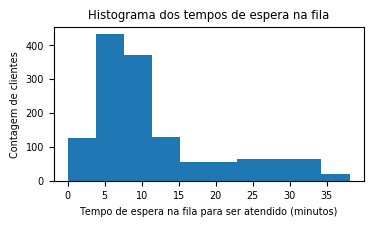

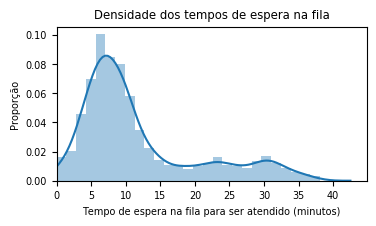

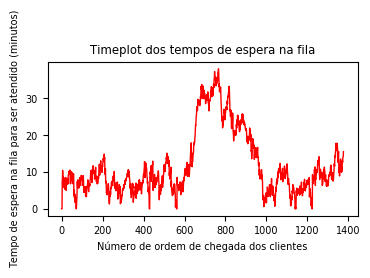

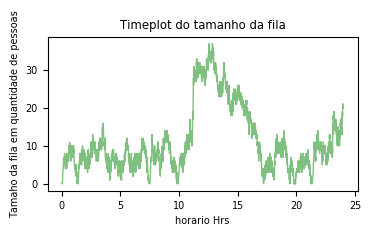

In [42]:
set_parameters(distribuicao_chegada = 'exp', 
               distribuicao_atendimento = 'gauss', 
               media_chegada = 60, 
               desvio_padrao_chegada = 10, 
               media_atendimento = 720, 
               desvio_padrao_atendimento = 60, 
               numero_de_caixas = 3, 
               senior_prioridade = False, 
               senior_probabilidade = 0.15, 
               verbose = False)

run_simulation(horas_de_simulacao = 24)

plot_simulation(histograma = True, densidade = True, 
                tempo_espera = True, tamnho_fila = True)


# **Exercícios**

Evolua a programa acima.

a) Permita que o usuário escolha a distribuições de probabilidade para os tempos entre chegadas de clientes. No programa acima, usamos a Distribuição Normal (parâmetros são o tempo médio e o desvio-padrão). Mas, uma melhor distribuição de probabilidades para esses tempos é a Distribuição Exponencial, cujo único parâmetro é a média (o desvio-padrão é sempre igual à média nesta distribuição). Permita também que o usuário escolha os parâmetros da distribuição.

b) Permita que o usuário escolha os parâmetros da distribuição normal de probabilidades para a duração do atendimento no caixa. 

c) Faça com que o programa informe o tamanho máximo da fila de clientes no banco.

d) Permita que o usuário defina o número de caixas disponíveis. 

e) Introduza o conceito de cliente senior. Usuário deve informar a probabilidade de um cliente ser senior. Faça com que o caixa 0 dê prioridade aos clientes senior.

Dicas:

*   normal: random.gauss(média, dp)
*   uniforme discreta: random.randint(mínimo, máximo)
*   uniforme contínua: random.uniform(mínimo, máximo)
*   exponencial: random.expovariate(1/média)








# Respostas

##### a) Permita que o usuário escolha a distribuições de probabilidade para os tempos entre chegadas de clientes. <br><br>No programa acima, usamos a Distribuição Normal (parâmetros são o tempo médio e o desvio-padrão). <br><br>Mas, uma melhor distribuição de probabilidades para esses tempos é a Distribuição Exponencial, cujo único parâmetro é a média (o desvio-padrão é sempre igual à média nesta distribuição). <br><br>Permita também que o usuário escolha os parâmetros da distribuição.